## Exercise 4
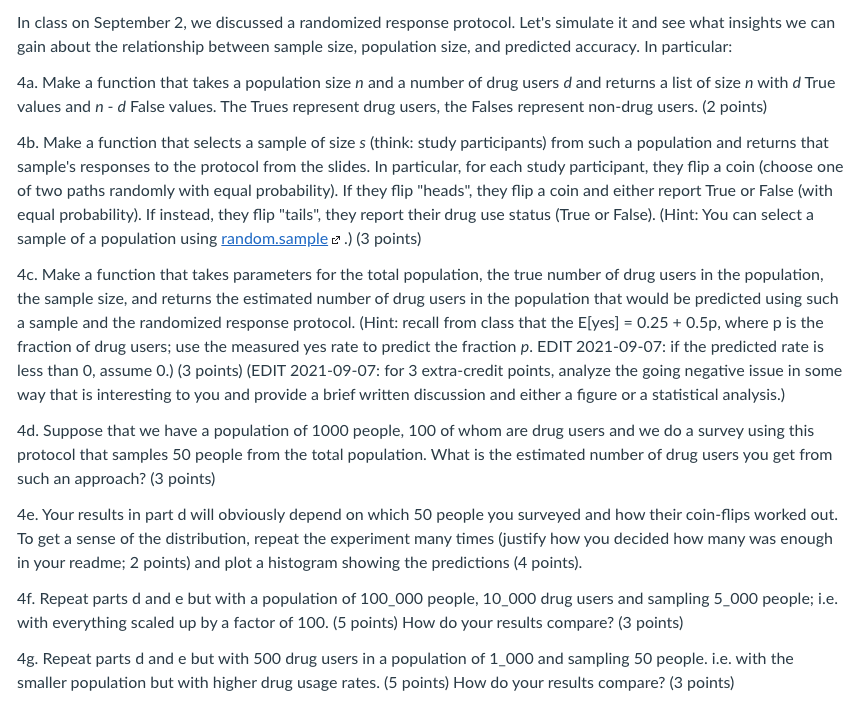


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

In [1]:
# 4a 
def return_values(n, d):
    if d<=n:
        return d*[True]+(n-d)*[False]
    else:
        raise ValueError('n<d')

In [2]:
# test code
return_values(5,3)

[True, True, True, False, False]

In [29]:
return_values(3,5)

ValueError: n<d

In [3]:
# 4b

import random
def random_pick(some_list, probabilities):
    x = random.uniform(0, 1)
    cumulative_probability = 0.0
    for item, item_probability in zip(some_list, probabilities):
        cumulative_probability += item_probability
        if x < cumulative_probability: 
            break
    return item


def report(n, k, p):
    """
    :param n: population
    :param k: sample number
    :param p: fraction of drug users
    :return: sample's responses list 
    
    """
    omega = [i for i in range(n)]
    sp_k = random.sample(omega, k)
    for i in range(k):
        tmp = random.randint(0,1)
        if tmp ==0:
            sp_k[i] = random_pick([False, True], [0.5, 0.5])
        else:
            sp_k[i] = random_pick([False, True], [1-p, p])
    return sp_k
        
        

In [5]:
# test code
report(10,7,0.2)

[False, False, False, False, False, True, False]

In [67]:
# 4c
def predict(n, d, k, rpt=1):
    prob = 0   
    # repeat rpt times
    for i in range(rpt):
        sp_k = report(n, k, d/n)
        # if the predicted rate is less than 0, assume 0.
        prob += max(2*sp_k.count(True)/k-0.5,0)
    prob /= rpt
#     usr_num = prob * k
    return prob

In [32]:
int(predict(1000,100,50)*50)

15

In [317]:
predict(10000000,1,10)

-0.09999999999999998

In [346]:
predict(1000,100,50)

0.06000000000000005

In [56]:
def repeat_exp(n, d, k, rpt=1):
    
    flag  = 1
#     usr_nums = []
#     if rpt>1:
#         tmp = 1
#         while tmp <= rpt:
#             usr_nums.append(int(predict(n, d, k, tmp) * k))
#             tmp +=1
            
            
        
    while flag>0:
        new, prev = predict(n, d, k, rpt+1), predict(n, d, k, rpt)
        
        diff = abs(new - prev)
        if diff < 0.01:
            flag -= 0.05
        else:
            flag = 1
        rpt += 1
#         usr_nums.append(int(new * k))
#     plt.hist(usr_nums, bins = 20)
#     plt.show()


    
    return rpt
            

In [57]:
repeat_exp(1000,100,50,100)

576

In [58]:
repeat_exp(100000,10000,5000)

30

In [64]:
repeat_exp(10000,500,50)

357

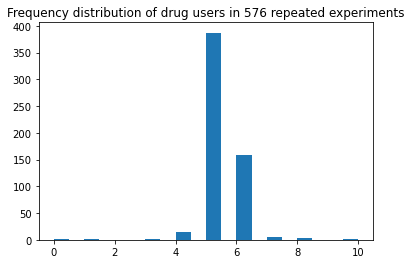

In [61]:
def plot_distrubution(n,d,k,rpt):
    usr_nums = []
    for i in range(1,rpt): 
        usr_nums.append(int(predict(n, d, k, i) * k))
            
    plt.hist(usr_nums, bins = 20)
    plt.title(f'Frequency distribution of drug users in {rpt} repeated experiments')
    plt.show()
plot_distrubution(1000,100,50,576) 

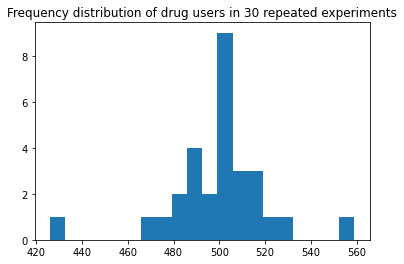

In [63]:
plot_distrubution(100000,10000,5000,30) 

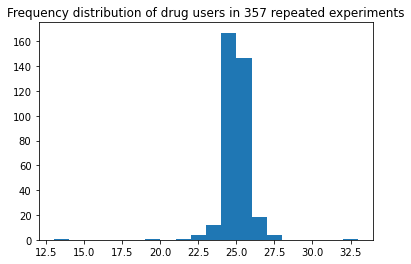

In [65]:
plot_distrubution(1000,500,50,357) 

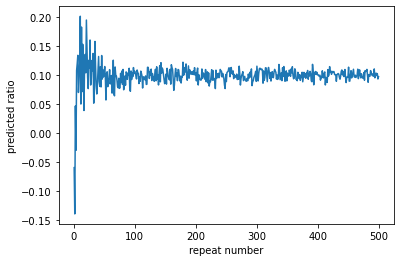

In [354]:
x = [i for i in range(1, 500)]
y = [predict(1000, 100, 50, j) for j in range(1, 500)]
plt.plot(x, y)
plt.xlabel('repeat number')
plt.ylabel('predicted ratio')
plt.show()

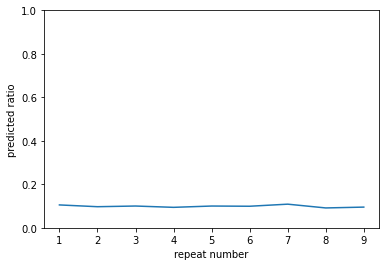

In [359]:
x = [i for i in range(1, 10)]
y = [predict(100000, 10000, 5000, j) for j in range(1, 10)]
plt.plot(x, y, scaley=False)
plt.xlabel('repeat number')
plt.ylabel('predicted ratio')
plt.show()

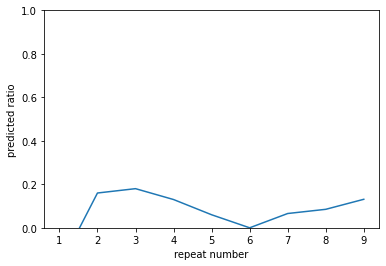

In [360]:
x = [i for i in range(1, 10)]
y = [predict(1000, 100, 50, j) for j in range(1, 10)]
plt.plot(x, y,scaley=False)
plt.xlabel('repeat number')
plt.ylabel('predicted ratio')
plt.show()

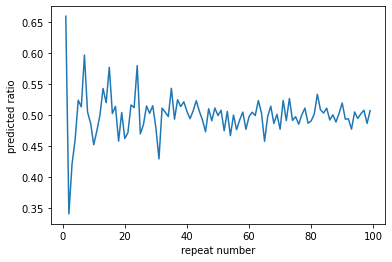

In [364]:
x = [i for i in range(1, 100)]
y = [predict(1000, 500, 50, j) for j in range(1, 100)]
plt.plot(x, y)
plt.xlabel('repeat number')
plt.ylabel('predicted ratio')
plt.show()

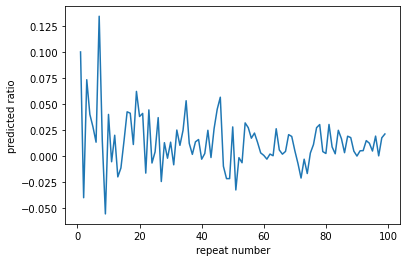

In [368]:
x = [i for i in range(1, 100)]
y = [predict(1000, 10, 50, j) for j in range(1, 100)]
plt.plot(x, y)
plt.xlabel('repeat number')
plt.ylabel('predicted ratio')
plt.show()

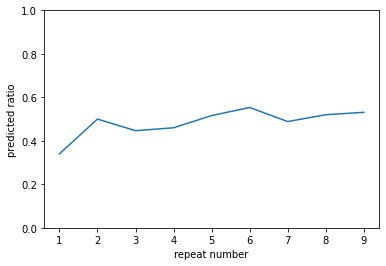

In [366]:
x = [i for i in range(1, 10)]
y = [predict(1000, 500, 50, j) for j in range(1, 10)]
plt.plot(x, y,scaley = False)
plt.xlabel('repeat number')
plt.ylabel('predicted ratio')
plt.show()